# Data Wrangling

Data wrangling is the process of `cleaning`, `transforming` and `organizing` data so that it can be used for `analysis` and `visualization`. It is an important step in the data analysis process because raw data is often `incomplete`, `inconsistent` and in an `unstructured` format, which can make it difficult to work with.

 - Data wrangling helps to make the data more `consistent`, `accurate` and `useful` for analysis and discision making.


## Steps
1. Gathering data
2. Tools to clean(kis se clean) - libraries
3. How to do, kaisy(steps)
4. 



In [ ]:
#librararies
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df= sns.load_dataset('titanic')

In [63]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [64]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [66]:
df.isnull().sum()/len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [67]:
#Removing 'deck' column
df.drop(columns='deck', inplace=True)

In [68]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [69]:
# dealing missing values
df['age']=df.age.fillna(df['age'].mean())

In [70]:
df['embarked']=df.embarked.fillna(df['embarked'].mode()[0])

In [71]:
df['embark_town']=df.embark_town.fillna(df['embark_town'].mode()[0])

In [72]:
df.isnull().sum()/len(df) * 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outliers removel

## visualization wala method:


<Axes: xlabel='sex', ylabel='age'>

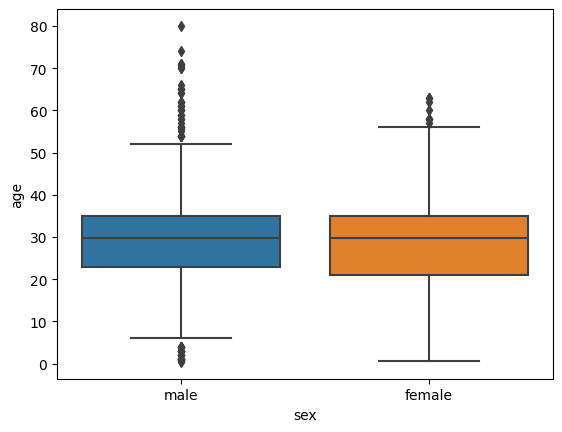

In [73]:
sns.boxplot(data=df, x="sex", y="age")

In [74]:
# IQR(Inter-Quartile Range) Method
#Removing outliers of "age" column
Q1= df['age'].quantile(0.25)
Q3= df['age'].quantile(0.75)
IQR= Q3-Q1
IQR
  # Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
df=df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]    

In [75]:
df.shape

(825, 14)

In [76]:
# IQR(Inter-Quartile Range) Method

Q1= df['fare'].quantile(0.25)
Q3= df['fare'].quantile(0.75)
IQR= Q3-Q1
IQR
  # Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
df=df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]  

In [77]:
df.shape

(718, 14)

<Axes: xlabel='fare', ylabel='Count'>

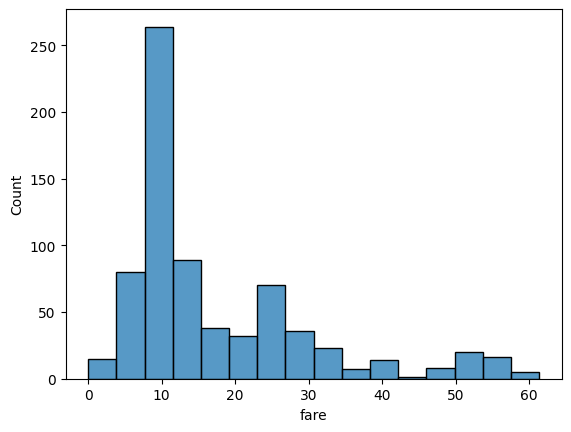

In [78]:
sns.histplot(df['fare'])

In [79]:
# Z-Score method
# pip install scipy
from scipy import stats
import numpy as np
zscore= np.abs(stats.zscore(df['age']))
threshold=3
df=df[(zscore < threshold).all(axis=1)]   # assingment

ValueError: No axis named 1 for object type Series

## Finding and dropping duplicates

In [ ]:
df.shape

(718, 14)

In [ ]:
#finding duplicates
df.duplicated().sum()

103

In [ ]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(615, 14)

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


## Data Normalilzation

In [104]:
#pip install scikit-learn 
#Step1: import libraries
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
#Step2:data
df

#Step3: select column to normalize
cols_to_normalize= ['age','fare']

#Step4: Create the scaler function
scaler=MinMaxScaler()

#Step5: fit and transform the data on scalar or vice versa
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

#Step6: Check the data
df

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.470588,0,0,0.211798,S,Second,man,True,Southampton,no,True,0
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True,0


In [27]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [28]:
#pip install scikit-learn 
#Step1: import libraries
import pandas as pd 
from sklearn.preprocessing import StandardScaler
#Step2:data
df

#Step3: select column to normalize
cols_to_normalize= ['age','fare']

#Step4: Create the scaler function
scaler=StandardScaler()

#Step5: fit and transform the data on scalar or vice versa
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

#Step6: Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.995147,0,5,0.794372,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.878384,0,0,0.858832,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123872,1,2,0.376301,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.222648,0,0,0.858832,C,First,man,True,Cherbourg,yes,True


In [29]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,6.150000e+02,615.000000,615.000000,6.150000e+02
mean,0.360976,2.469919,3.061688e-16,0.460163,0.365854,-1.213122e-16
std,0.480674,0.741063,1.000814e+00,0.894039,0.835572,1.000814e+00
min,0.000000,1.000000,-2.377209e+00,0.000000,0.000000,-1.351236e+00
25%,0.000000,2.000000,-5.973545e-01,0.000000,0.000000,-7.695610e-01
50%,0.000000,3.000000,1.238725e-01,0.000000,0.000000,-3.935399e-01
75%,1.000000,3.000000,5.267644e-01,1.000000,0.000000,5.641565e-01
max,1.000000,3.000000,2.400296e+00,5.000000,6.000000,3.170505e+00


## StandardSalar equation
x_stand= (x - x(mean) / std(x))\
Where:\
X_stand is the standard variable\
x: original variable\
mean(x): the mean of variable x\
std(x): the standard daviation of variable x

## Log Transformation 

In [89]:
kashti=sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [81]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [86]:
import numpy as np

kashti['age']= kashti['age'].fillna(kashti['age'].median())
kashti['fare']=kashti['fare'].fillna(kashti['fare'].median())

#log transform
kashti['age']=np.log(kashti['age'])
kashti['fare']=np.log(kashti['fare'])
kashti.head()

c:\Users\Rao Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Rao Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1.128508,1,0,0.683603,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1.291320,1,0,1.450832,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,1.181143,0,0,0.727559,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1.268453,1,0,1.379314,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,1.268453,0,0,0.735091,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

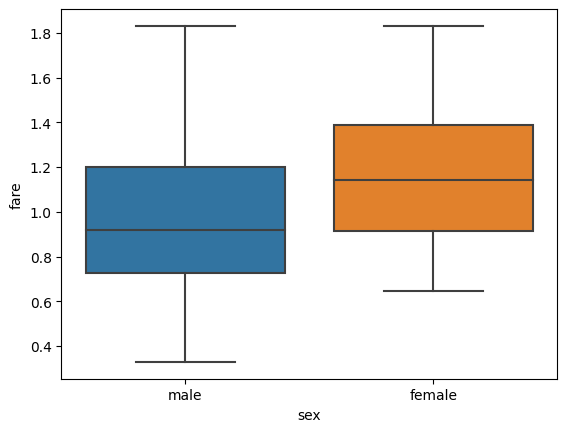

In [87]:
sns.boxplot(data=kashti, x="sex", y="fare")

<Axes: xlabel='age', ylabel='Count'>

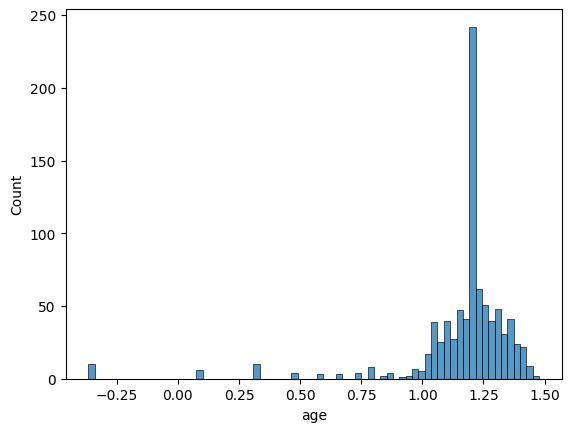

In [88]:
#age ka ziada gap ha
sns.histplot(kashti['age'])

<Axes: xlabel='age', ylabel='Count'>

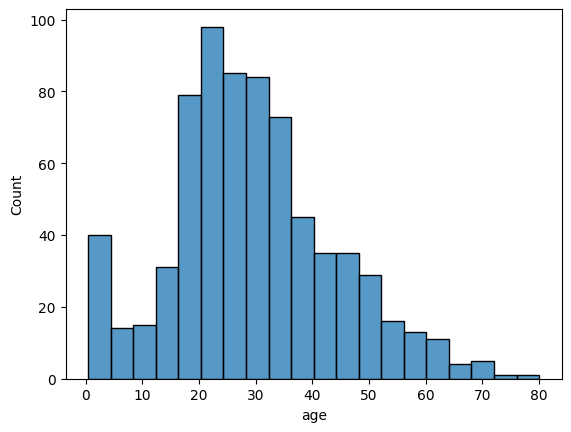

In [90]:
#original age 
sns.histplot(kashti['age'])

In [91]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

## Organizing the data
apny samjhny k liye or logon ko samjhany k liye

In [105]:
# creating column of family size
df['family_size']=df['sibsp'] + df['parch']

In [93]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,0


<Axes: xlabel='family_size', ylabel='Count'>

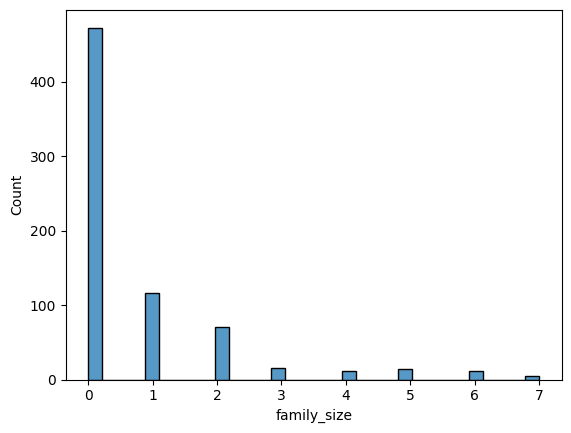

In [95]:
sns.histplot(df['family_size'])

c:\Users\Rao Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

c:\Users\Rao Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Rao Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


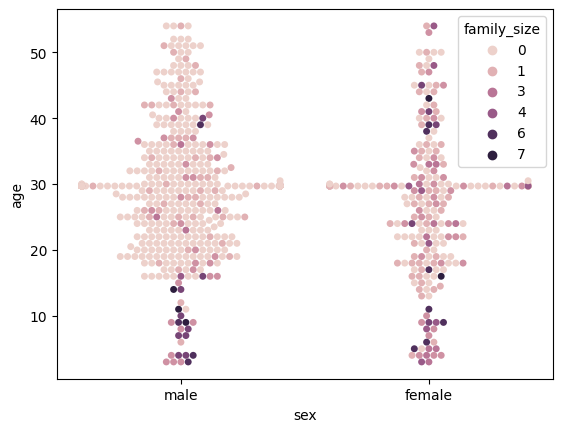

In [96]:
sns.swarmplot(data=df, x='sex', y='age', hue="family_size")

In [98]:
df= df.rename(columns={'survived':'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [101]:
#pivot table
table= pd.pivot_table(df,values='fare', index='who',
                    columns = 'survival', aggfunc=np.sum)
table

survival,0,1
who,,
child,711.8834,629.9043
man,5383.7489,1671.3333
woman,1013.1335,2934.7169


<Axes: xlabel='fare', ylabel='age'>

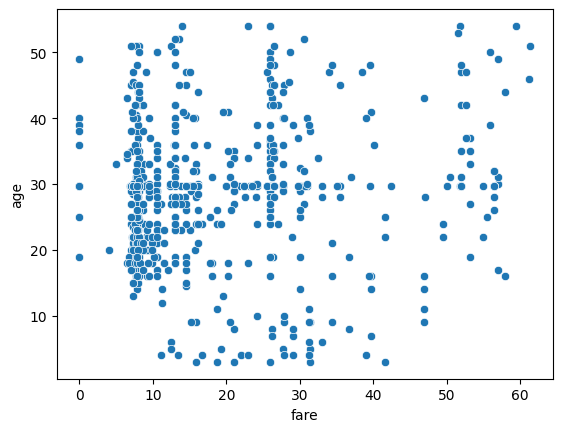

In [102]:
sns.scatterplot(data=df, x='fare', y='age')

In [106]:
df['family_size']=df['sibsp'] + df['parch']

In [107]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0


## Saving the wrangled data

In [108]:
df.to_csv('preprocessed_data.csv')

___
## June 15, 2023